In [22]:
import numpy as np 
import pandas as pd
import datetime
import calendar
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [23]:
avisosDetalle = pd.read_csv('../data/datos_navent_fiuba/fiuba_6_avisos_detalle.csv')

In [24]:
avisosDetalle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13534 entries, 0 to 13533
Data columns (total 11 columns):
idaviso                 13534 non-null int64
idpais                  13534 non-null int64
titulo                  13534 non-null object
descripcion             13534 non-null object
nombre_zona             13534 non-null object
ciudad                  47 non-null object
mapacalle               872 non-null object
tipo_de_trabajo         13534 non-null object
nivel_laboral           13534 non-null object
nombre_area             13534 non-null object
denominacion_empresa    13529 non-null object
dtypes: int64(2), object(9)
memory usage: 1.1+ MB


In [25]:
avisosDetalle.columns

Index(['idaviso', 'idpais', 'titulo', 'descripcion', 'nombre_zona', 'ciudad',
       'mapacalle', 'tipo_de_trabajo', 'nivel_laboral', 'nombre_area',
       'denominacion_empresa'],
      dtype='object')

### Modalidades de trabajo (tiempo)

In [26]:
avisosDetalle.tipo_de_trabajo.value_counts()

Full-time          12339
Part-time            863
Teletrabajo          110
Pasantia              63
Por Horas             63
Temporario            42
Por Contrato          37
Fines de Semana       14
Primer empleo          3
Name: tipo_de_trabajo, dtype: int64

<Container object of 9 artists>

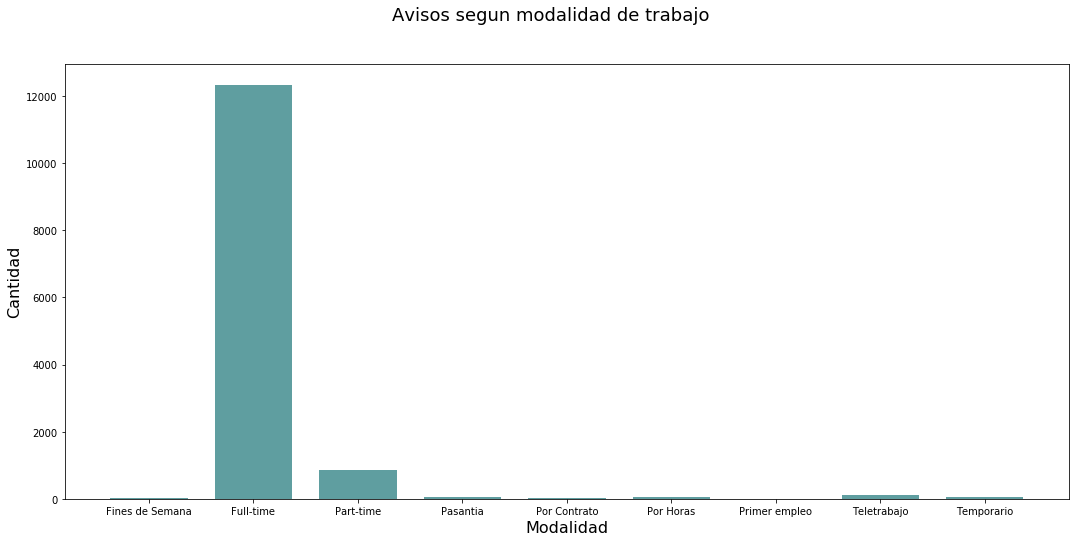

In [27]:
modalidadesTrabajo = ['Full-time','Part-time','Teletrabajo','Pasantia','Por Horas','Temporario','Por Contrato','Fines de Semana','Primer empleo']
num_items=len(modalidadesTrabajo)
plt.figure(figsize=(18,8))
margin = 0.05
width = 7*(1.-1*margin)/num_items
plt.suptitle('Avisos segun modalidad de trabajo', fontsize=18)
plt.xlabel('Modalidad', fontsize=16)
plt.ylabel('Cantidad', fontsize=16)
plt.bar(modalidadesTrabajo, avisosDetalle.tipo_de_trabajo.value_counts(), width, color="cadetblue")


### Zona de los avisos

In [28]:
avisosDetalle.groupby('nombre_zona').count()

,idaviso,idpais,titulo,descripcion,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
nombre_zona,,,,,,,,,,
Buenos Aires (fuera de GBA),2,2,2,2,0,0,2,2,2,2
Capital Federal,876,876,876,876,4,871,876,876,876,876
GBA Oeste,2,2,2,2,0,1,2,2,2,2
Gran Buenos Aires,12654,12654,12654,12654,43,0,12654,12654,12654,12649


<Container object of 4 artists>

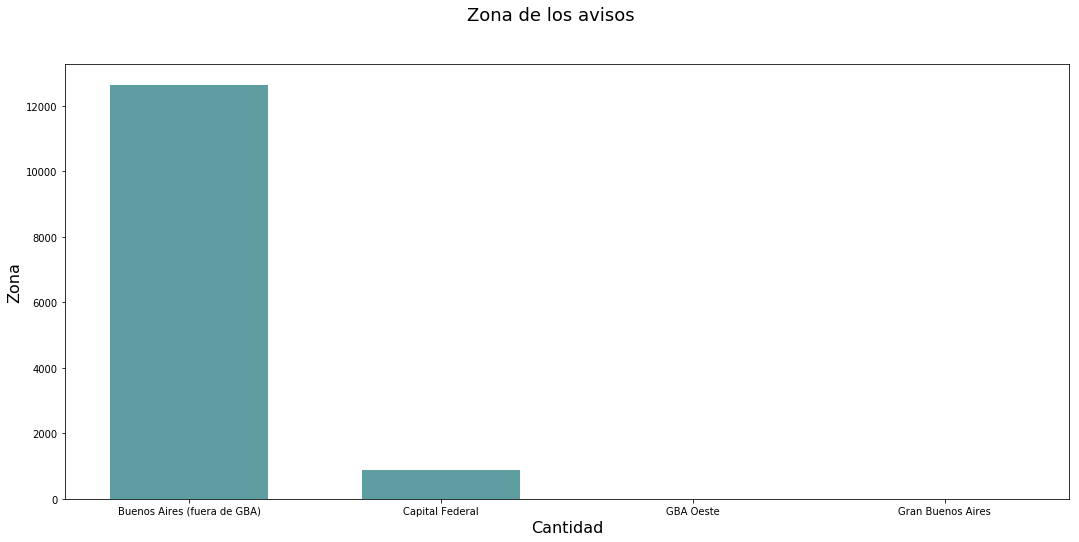

In [29]:
zona_avisos = ['Buenos Aires (fuera de GBA)','Capital Federal','GBA Oeste','Gran Buenos Aires']
num_items=len(zona_avisos)
plt.figure(figsize=(18,8))
margin = 0.5
width = 5*(1.-1*margin)/num_items
plt.suptitle('Zona de los avisos', fontsize=18)
plt.xlabel('Cantidad', fontsize=16)
plt.ylabel('Zona', fontsize=16)
plt.bar(zona_avisos, avisosDetalle.nombre_zona.value_counts(), width, color="cadetblue")

### Direcciones

In [18]:
print("El", round(avisosDetalle['mapacalle'].isnull().sum()/len(avisosDetalle), 2), "% de los datos de la columna dirección son nulos")

El 0.94 % de los datos de la columna dirección son nulos


### Empresas

In [40]:
empresas_top = avisosDetalle.groupby('denominacion_empresa').size().sort_values(ascending=False).head(20) # 2592 empresas diferentes

In [41]:
# TODO: meter visu y mas analisis de esto

### Analisis primeros caracteres de la descripcion

In [180]:
stopwords = ['a', 'al', 'ante', 'aquel', 'bien', 'como', 'con', 'conseguir', 'cual', 'de', 'del', 
             'desde', 'donde', 'el', 'ella', 'en', 'es', 'encima', 'entonces', 'entre', 'era', 'esta', 'estás', 'estas' 'estan', 
             'están', 'etc', 'fue', 'ha', 'hacen', 'hacemos', 'hacer', 'hasta', 'incluso', 'ir', 'jamas', 
             'jamás', 'la', 'las', 'lo', 'los', 'más', 'me', 'menos', 'mi', 'mis', 'misma', 'mucha', 'muchas', 
             'mucho', 'muchos', 'muy', 'ni', 'no', 'nos', 'nosotros', 'nuestra', 'para', 'que', 'qué', 'sabe', 'saber', 'se', 
             'según', 'ser', 'si', 'sí', 'siendo', 'sin', 'sobre', 'solo', 'somos', 'te', 'tiene', 'tus', 'tu', 'uso', 
             'un', 'vaya', 'y']

invalid_characters = [',', ':', '.', ';', '', '?', '¿', '!', '¡', '(', ')', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '<', '>']

# Mejorar que en algunos casos ej: <p>asd<p>qwe va a traer la palabra asdqwe
def clean_description(row):  
    clean_regex = re.compile('<.*?>')
    row['descripcion_top_words_small'] = re.sub(clean_regex, '', row['descripcion'])

    # Se conservan los primeros 130 caracteres que son los que se ven en la vista previa
    # Descarto este enfoque porque se pierden algunas palabras que quedan partidas en la mitad
    #row['descripcion'] = row['descripcion'][0:130] 
    
    # En cambio nos quedamos con las primeras n palabras
    words = row['descripcion_top_words_small'].split()
    words = words[:25]
    
    # Se filtran las stop words y los simbolos
    valid_words = []
    for word in words:
        for w in stopwords:
            if (word.lower() == w):
                word = word.lower().replace(w, '')
        for inv in invalid_characters:
            word = word.lower().replace(inv, '')
            
        valid_words.append(word)
        
    row['descripcion_top_words_small'] = set(valid_words) 
    return row

In [181]:
detalle_avisos_limpio = avisosDetalle.apply(lambda row: clean_description(row), axis=1)

In [182]:
detalle_avisos_limpio['descripcion_top_words_small'][10]

{'',
 'cruz',
 'encontramos',
 'incorporar',
 'minera',
 'mismo',
 'operación',
 'paramedico',
 'proceso',
 'provincia',
 'puede',
 'santa',
 'selección',
 'ubicada'}